In [17]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import scipy.io as sio
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
#from functions import (gaussian_kernal, dataset_params)

In [59]:
data=sio.loadmat("ex6data1.mat")

In [60]:
X=data["X"]
y=data["y"]

In [61]:
print('Loading and Visualizing Data ...\n')

Loading and Visualizing Data ...



In [62]:
pos=(y==1).ravel()
neg=(y==0).ravel()

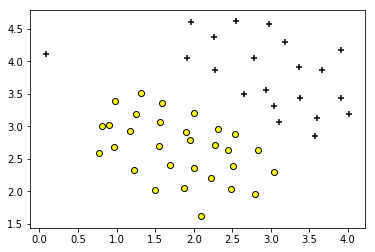

In [63]:
plt.scatter(X[pos,0],X[pos,1],color="black",marker="+")
plt.scatter(X[neg,0],X[neg,1],color="yellow",edgecolors='black',marker="o")
plt.show()

In [64]:
print('Training Linear SVM ...\n')

Training Linear SVM ...



In [65]:
C=1
svm=SVC(kernel="linear",C=C)
svm.fit(X,y.ravel())
weights=svm.coef_[0]
intercept=svm.intercept_[0]

In [66]:
xp=np.linspace(X.min(),X.max(),100)
yp=-(weights[0]*xp+intercept)/weights[1]

In [67]:
pos=(y==1).ravel()
neg=(y==0).ravel()

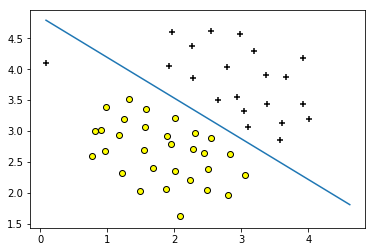

In [68]:
plt.scatter(X[pos,0],X[pos,1],color="black",marker="+")
plt.scatter(X[neg,0],X[neg,1],color="yellow",edgecolors='black',marker="o")
plt.plot(xp,yp)
plt.show()

In [69]:
def gaussian_kernal(x1,x2,sigma):
    return np.exp(-(np.linalg.norm(x1-x2)**2).sum()/(2*(sigma**2)))

In [70]:
x1=np.array([1,2,1])
x2=np.array([0,4,-1])
sigma=2
sim=gaussian_kernal(x1,x2,sigma)

In [75]:
print(
    'Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = {0} :\n'
    .format(sigma),
    '\t{0:.6f}\n(for sigma = 2, this value should be about 0.324652)'
.format(sim))

Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = 2 :
 	0.324652
(for sigma = 2, this value should be about 0.324652)


In [76]:
#Visualizing Dataset 2 
data = sio.loadmat('ex6data2.mat')
X = data['X']  # 863 x 2 matrix
y = data['y'] # 863 x 1 matrix

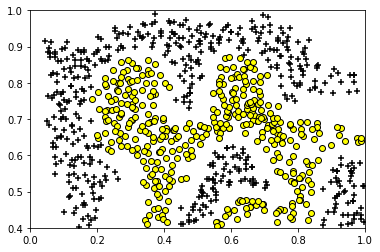

In [77]:

pos = (y == 1).ravel()
neg = (y == 0).ravel()
plt.scatter(X[pos, 0], X[pos, 1], color='black', marker='+')
plt.scatter(
    X[neg, 0], X[neg, 1], color='yellow', edgecolors='black', marker='o')
plt.xlim(0, 1)
plt.ylim(0.4, 1)
plt.show()

In [78]:
def dataset3_params(X, y, Xval, yval):
    C_vec = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    sigma_vec = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    scores = np.zeros((len(C_vec), len(sigma_vec)))

    for i in range(len(C_vec)):
        for j in range(len(sigma_vec)):
            svm = SVC(kernel='rbf', C=C_vec[i], gamma=sigma_vec[j])
            svm.fit(X, y.ravel())
            scores[i, j] = accuracy_score(yval, svm.predict(Xval))

    max_c_index, max_s_index = np.unravel_index(scores.argmax(), scores.shape)
    return (C_vec[max_c_index], sigma_vec[max_s_index])

In [79]:
C = 30
sigma = 30

svm = SVC(kernel='rbf', C=C, gamma=sigma)
svm.fit(X, y.ravel())

SVC(C=30, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=30, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [104]:
x1=np.linspace(X[:,0].min(),X[:,0].max(),100)
x2=np.linspace(X[:,1].min(),X[:,1].max(),100)
x1,x2=np.meshgrid(x1,x2)
yp=svm.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape)

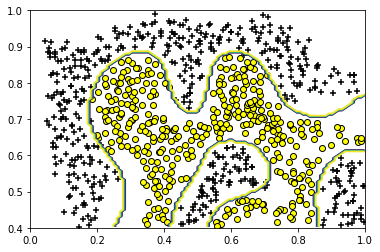

In [105]:
pos = (y == 1).ravel()
neg = (y == 0).ravel()
plt.scatter(X[pos, 0], X[pos, 1], color='black', marker='+')
plt.scatter(
    X[neg, 0], X[neg, 1], color='yellow', edgecolors='black', marker='o')
plt.xlim(0, 1)
plt.ylim(0.4, 1)
plt.contour(x1, x2, yp)
plt.show()

In [106]:
# Visualizing Dataset 3 
data = sio.loadmat('ex6data3.mat')
X = data['X']  # 211 x 2 matrix
y = data['y']  # 211 x 1 matrix
Xval = data['Xval']  # 200 x 2 matrix
yval = data['yval']  # 200 x 1 matrix


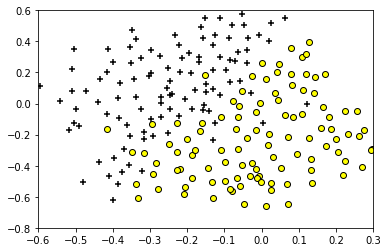

In [107]:
pos = (y == 1).ravel()
neg = (y == 0).ravel()
plt.scatter(X[pos, 0], X[pos, 1], color='black', marker='+')
plt.scatter(
    X[neg, 0], X[neg, 1], color='yellow', edgecolors='black', marker='o')
plt.xlim(-0.6, 0.3)
plt.ylim(-0.8, 0.6)
plt.show()

In [108]:

# RBF Kernel (Dataset 3)
C, sigma = dataset3_params(X, y, Xval, yval)

svm = SVC(kernel='rbf', C=C, gamma=sigma)
svm.fit(X, y.ravel())



SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=30, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [109]:
x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
x1, x2 = np.meshgrid(x1, x2)
yp = svm.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape)



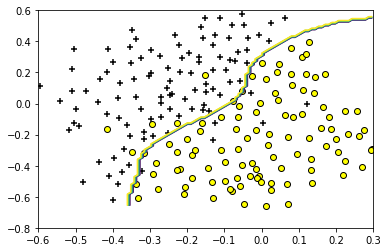

In [110]:
pos = (y == 1).ravel()
neg = (y == 0).ravel()
plt.scatter(X[pos, 0], X[pos, 1], color='black', marker='+')
plt.scatter(
    X[neg, 0], X[neg, 1], color='yellow', edgecolors='black', marker='o')
plt.xlim(-0.6, 0.3)
plt.ylim(-0.8, 0.6)
plt.contour(x1, x2, yp)
plt.show()

